# Logistic Regression

Objective: Predicting does client subscribed a term deposit based on features  
Dataset: banking.csv  
Ref: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv("banking.csv")
print('Dataset size', data.shape)
data.head()

Dataset size (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [3]:
data.drop(['month','day_of_week'],axis=1,inplace=True)

## Data Preparation and Exploration

In [4]:
data['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


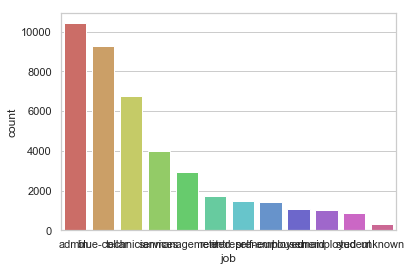

In [5]:
print(data['job'].value_counts())

sns.countplot(x='job',data = data, palette='hls',order = data['job'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [6]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


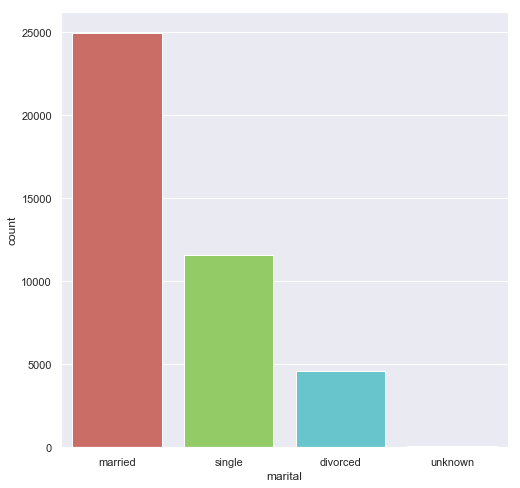

In [7]:
print(data['marital'].value_counts())

sns.countplot(x='marital',data = data, palette='hls',order = data['marital'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [8]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


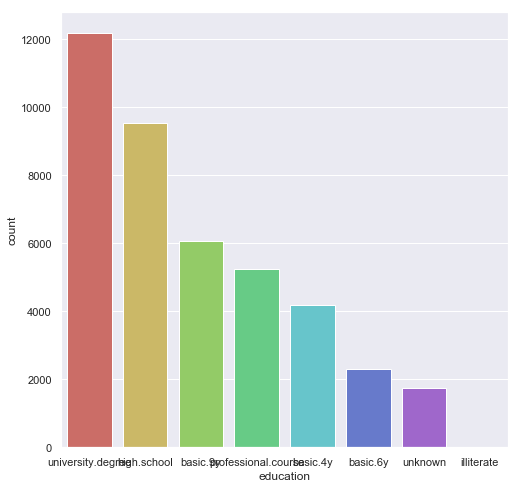

In [9]:
print(data['education'].value_counts())

sns.countplot(x='education',data = data, palette='hls',order = data['education'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

0    36548
1     4640
Name: y, dtype: int64


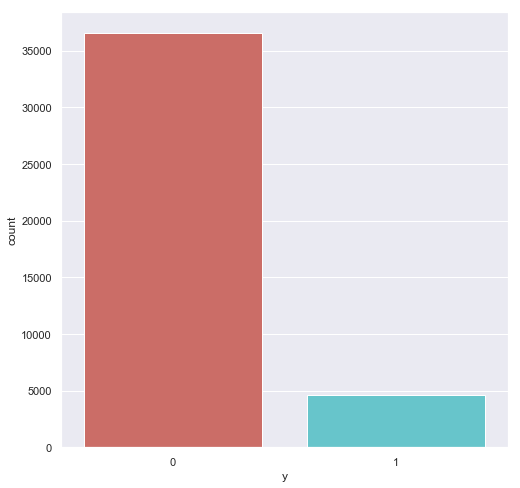

In [10]:
print(data['y'].value_counts())

sns.countplot(x='y',data = data, palette='hls',order = data['y'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Data Processing and Selection

In [11]:
#replace strings with numbers format
data['job']= data['job'].replace('admin.', 0)
data['job']= data['job'].replace('blue-collar', 1)
data['job']= data['job'].replace('technician' , 2)
data['job']= data['job'].replace('services'   , 3)
data['job']= data['job'].replace('management' , 4)
data['job']= data['job'].replace('retired'    , 5)
data['job']= data['job'].replace('entrepreneur' , 6)
data['job']= data['job'].replace('self-employed', 7)
data['job']= data['job'].replace('housemaid' , 8)
data['job']= data['job'].replace('unemployed', 9)
data['job']= data['job'].replace('student'   , 10)
data['job']= data['job'].replace('unknown'   , 11)

data['marital']= data['marital'].replace('divorced', 0)
data['marital']= data['marital'].replace('single' , 1) 
data['marital']= data['marital'].replace('married', 2) 
data['marital']= data['marital'].replace('unknown', 3) 

data['education']= data['education'].replace('illiterate', 0)
data['education']= data['education'].replace('unknown'   , 1)
data['education']= data['education'].replace('basic.6y'  , 2)
data['education']= data['education'].replace('basic.4y'  , 3)
data['education']= data['education'].replace('professional.course', 4)
data['education']= data['education'].replace('basic.9y'         , 5)
data['education']= data['education'].replace('high.school'      , 6)
data['education']= data['education'].replace('university.degree', 7)

data['default']= data['default'].replace('no' , 0)
data['default']= data['default'].replace('yes', 1)
data['default']= data['default'].replace('unknown', 2)

data['housing']= data['housing'].replace('no' , 0)
data['housing']= data['housing'].replace('yes', 1)
data['housing']= data['housing'].replace('unknown', 2)

data['loan']= data['loan'].replace('no' , 0)
data['loan']= data['loan'].replace('yes', 1)
data['loan']= data['loan'].replace('unknown', 2)

data['contact']= data['contact'].replace('cellular' , 0)
data['contact']= data['contact'].replace('telephone', 1)

data['poutcome']= data['poutcome'].replace('failure', 0)
data['poutcome']= data['poutcome'].replace('success', 1)
data['poutcome']= data['poutcome'].replace('nonexistent', 2)

data.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,2,3,2,1,0,0,210,1,999,0,2,1.4,93.444,-36.1,4.963,5228.1,0
1,53,2,2,1,0,0,0,0,138,1,999,0,2,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,1,7,0,1,0,0,339,3,6,2,1,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,3,2,6,0,0,0,0,185,2,999,0,2,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,2,3,0,1,0,0,137,1,3,1,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
age               41188 non-null int64
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
default           41188 non-null int64
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(14)
memory usage: 6.0 MB


## Correlation

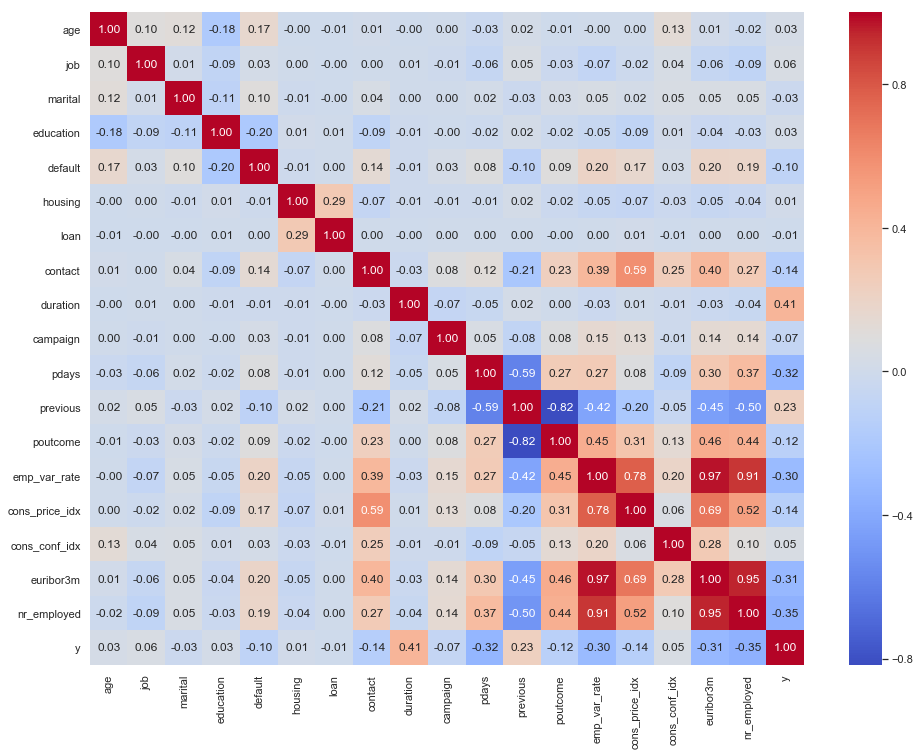

In [13]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [14]:
corr_rank = data.corr()
corr_rank["y"].sort_values(ascending=False)

y                 1.000000
duration          0.405274
previous          0.230181
job               0.055852
cons_conf_idx     0.054878
age               0.030399
education         0.026791
housing           0.009552
loan             -0.005038
marital          -0.025185
campaign         -0.066357
default          -0.099324
poutcome         -0.122089
cons_price_idx   -0.136211
contact          -0.144773
emp_var_rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr_employed      -0.354678
Name: y, dtype: float64

## Data processing and Selection

In [15]:
# define X (feature data) and Y (target data) and convert to numpy array
X = np.asarray(data[['duration','previous','job','cons_conf_idx','age','education','housing']])
print(X.shape)
X[0:5]

(41188, 7)


array([[210. ,   0. ,   1. , -36.1,  44. ,   3. ,   1. ],
       [138. ,   0. ,   2. , -42. ,  53. ,   1. ,   0. ],
       [339. ,   2. ,   4. , -39.8,  28. ,   7. ,   1. ],
       [185. ,   0. ,   3. , -47.1,  39. ,   6. ,   0. ],
       [137. ,   1. ,   5. , -31.4,  55. ,   3. ,   1. ]])

In [16]:
y = np.asarray(data['y'])
print(y.shape)
y[0:5]

(41188,)


array([0, 0, 1, 0, 1], dtype=int64)

In [17]:
#normalize dataset, why?
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.18623008, -0.34949428, -0.56107216,  0.95126739,  0.38152696,
        -1.22255307,  0.79098953],
       [-0.46392633, -0.34949428, -0.19087095, -0.32354233,  1.24515746,
        -2.35740502, -1.05674622],
       [ 0.31130902,  3.69176641,  0.54953146,  0.15181045, -1.15381613,
         1.04715083,  0.79098953],
       [-0.28265239, -0.34949428,  0.17933025, -1.42549649, -0.09826775,
         0.47972485, -1.05674622],
       [-0.46778322,  1.67113606,  0.91973266,  1.96679378,  1.43707534,
        -1.22255307,  0.79098953]])

## Split / Train / Test Dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4)
print('TRAIN set:', X_train.shape,y_train.shape)
print('TEST set :', X_test.shape, y_test.shape)

TRAIN set: (28831, 7) (28831,)
TEST set : (12357, 7) (12357,)


## Modelling

In [19]:
#using liblinear solver
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

ypred = logreg.predict(X_test)
print(ypred.shape)
ypred

(12357,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
ypred_prob = logreg.predict_proba(X_test)

## Evaluation

In [21]:
#accuracy evaluation using jaccard index
#if match - accuracy us 1.0 otherwise 0
from sklearn.metrics import jaccard_similarity_score
print('Jaccard Accuracy Score: ', round(jaccard_similarity_score(y_test, ypred)*100,4))
print('Default Accuracy Score: ', round(logreg.score(X_train,y_train)*100,4))

Jaccard Accuracy Score:  89.4392
Default Accuracy Score:  89.7021
